In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/ibm/'))

In [2]:
import numpy as np

import qiskit
provider = qiskit.IBMQ.load_account()
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from ibm.ibm_parameters import *

from matplotlib import pyplot as plt
%matplotlib inline

from ibm_landscape_processes import *

ibmqfactory.load_account:WARNING:2021-08-23 15:52:30,044: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
%load_ext autoreload
%autoreload 2

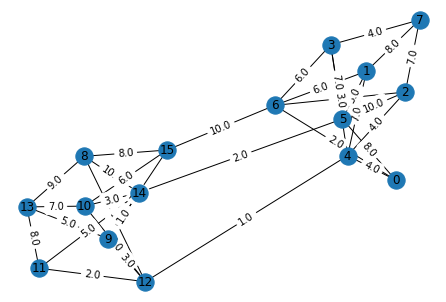

In [4]:
# ---- Define graph and MaxCut ----
graph = load_nx_graph_from("/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/data/graphs/16_nodes/graph_16_33_01_w.txt")
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
max_cut.draw()

In [5]:
# ---- Define step size and gamma, beta values ----
step_size = 0.1
a_gamma = np.arange(-np.pi, np.pi, step_size)
b_beta = np.arange(-np.pi, np.pi, step_size)

In [6]:
gammas, betas = np.meshgrid(a_gamma, b_beta)

In [7]:
# ---- execute for all values QAOA and get result matrix  ----
landscape = run_all(gammas, betas, max_cut)

Row 0
Row 1
Row 2
Row 3
Row 4
Row 5
Row 6
Row 7
Row 8
Row 9
Row 10
Row 11
Row 12
Row 13
Row 14
Row 15
Row 16
Row 17
Row 18
Row 19
Row 20
Row 21
Row 22
Row 23
Row 24
Row 25
Row 26
Row 27
Row 28
Row 29
Row 30
Row 31
Row 32
Row 33
Row 34
Row 35
Row 36
Row 37
Row 38
Row 39
Row 40
Row 41
Row 42
Row 43
Row 44
Row 45
Row 46
Row 47
Row 48
Row 49
Row 50
Row 51
Row 52
Row 53
Row 54
Row 55
Row 56
Row 57
Row 58
Row 59
Row 60
Row 61
Row 62


[[-88.38999939 -88.74512482 -88.38337708 ... -88.72437286 -88.65374756
  -88.42675018]
 [-88.58650208 -89.01049805 -89.28150177 ... -87.07362366 -87.0252533
  -87.94274902]
 [-88.34412384 -87.72350311 -87.6289978  ... -89.60800171 -89.2480011
  -88.91300201]
 ...
 [-88.46362305 -90.18875122 -91.95662689 ... -84.63999939 -85.48737335
  -86.9783783 ]
 [-88.67524719 -88.58362579 -88.48950195 ... -88.13674927 -88.26487732
  -88.56400299]
 [-88.10587311 -87.72537231 -87.79987335 ... -89.87037659 -89.42312622
  -88.79975128]]


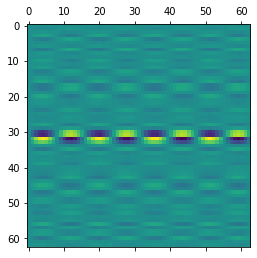

In [8]:
print(landscape)
plt.matshow(landscape)
plt.show()

In [9]:
# Mean of landscape
np.mean(landscape)

-88.50240650883427

In [10]:
# Minimium 
np.min(landscape)

-116.15299987792969

In [11]:
# Display Coordinates of Minimum 
np.unravel_index(np.argmin(landscape), landscape.shape)

(32, 43)

In [12]:
# Gamma and beta value of Minimium
i, j = np.unravel_index(np.argmin(landscape), landscape.shape)
opt_gamma = gammas[i,j]
opt_beta = betas[i,j]
print(f"Opt.Gamma: {opt_gamma}, Opt.Beta: {opt_beta}")

Opt.Gamma: 1.1584073464102111, Opt.Beta: 0.058407346410209726


In [17]:
# Save result matrix 
with open('landscape_simulator_paper_weights_results.npy', 'wb') as f:
    np.save(f, landscape)

In [13]:
import plotly.graph_objects as go

In [15]:
# Plot landscape in 3D 
a_gamma = np.arange(-np.pi, np.pi, step_size)
b_beta = np.arange(-np.pi, np.pi, step_size)
fig = go.Figure(data=go.Surface(z=landscape, x=a_gamma, y=b_beta))

fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor='limegreen', project_z=True))


fig.update_layout(title="QAOA MaxCut", scene=dict(
    xaxis_title="gamma",
    yaxis_title="beta",
    zaxis_title="mean"
))

In [16]:
# Plot Heatmap 
fig = go.Figure(data=go.Heatmap(z=landscape, y=b_beta, x=a_gamma, type = 'heatmap', colorscale = 'viridis'))

# Update Layout
fig.update_layout(title="QAOA MaxCut", width=700, height=700, xaxis_title="beta", yaxis_title="gamma")

# Display Global Minimium 
fig.add_trace(
    go.Scatter(mode="markers", y=[opt_beta], x=[opt_gamma], marker_symbol=[204], text = [landscape[i,j]],
                   marker_color="red",  hovertemplate="x: %{x}<br>y: %{y}<br> z: %{text:.2f}<extra></extra>", 
                   marker_line_width=1, marker_size=16))


In [ ]:
# Display Optimizer Results

# Display path 
#fig.add_trace(
#    go.Scatter(mode="lines", x=gammas, y=betas, marker_symbol=[200],
#                   marker_color="white", marker_line_width=1, marker_size=8)
#)

# Display start point
#fig.add_trace(
#    go.Scatter(mode="markers", x=[gammas[0]], y=[betas[0]], marker_symbol=[204],
#                   marker_color="gray", 
#                   marker_line_width=1, marker_size=16))

# Display end point
#fig.add_trace(
#    go.Scatter(mode="markers", x=[gammas[-1]], y=[betas[-1]], marker_symbol=[204],
#                   marker_color="green", 
#                   marker_line_width=1, marker_size=16))



In [ ]:
# Plot Optimizer History
#fig = go.Figure(data=go.Scatter(x=counts, y=values))
#fig.update_layout(xaxis_title="Evaluation Counts", yaxis_title="Evaluated Mean", title="Optimizer")
#fig.show()